<a href="https://colab.research.google.com/github/CarlosLeandro09/DataAnalysisRadiology/blob/main/MTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My work: Modulation transfer function, serves to measure spatial resolution of an image

In [ ]:
import cv2
import matplotlib.pyplot as plt
import scipy as scipy
import scipy.misc as misc
import scipy.interpolate as interp
import scipy.ndimage as ndimage
import scipy.fft as fp
import numpy as np
import sklearn as skl

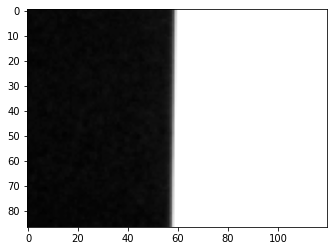

In [ ]:
im = cv2.imread('/content/IMG-0001-0000123.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap = 'gray')

In [ ]:
corte = im

In [ ]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

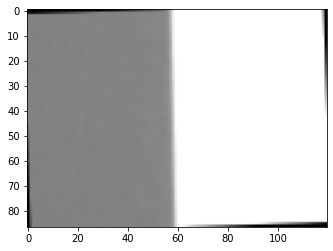

In [ ]:
im = rotate_image(im, 1.9)
plt.imshow(im, cmap = 'gray')

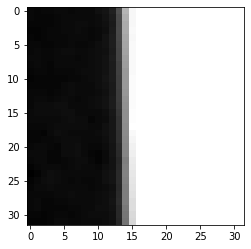

In [ ]:
y, x = im.shape[0],im.shape[1]

c_x = x/2
c_y = y/2

x_0 = int(c_x-16)
y_0 = int(c_y-16)
x_32 = int(c_x+16)
y_32 = int(c_y+16)

corte = im[y_0:y_32,x_0:x_32]
plt.imshow(corte, cmap = 'gray')

In [ ]:
meanOfColumns = np.mean(corte, axis=0)
meanOfColumns

array([129.44827586, 129.5862069 , 129.90804598, 130.03448276,
       129.62068966, 129.6091954 , 129.72413793, 129.77011494,
       130.11494253, 130.02298851, 129.83908046, 129.89655172,
       129.79310345, 129.96551724, 129.97701149, 130.10344828,
       129.94252874, 129.86206897, 130.08045977, 130.12643678,
       130.12643678, 130.25287356, 130.27586207, 130.28735632,
       130.27586207, 130.44827586, 130.32183908, 130.45977011,
       130.47126437, 130.50574713, 130.72413793, 130.73563218,
       130.85057471, 130.70114943, 130.71264368, 130.64367816,
       130.57471264, 130.5862069 , 130.57471264, 130.97701149,
       131.18390805, 131.09195402, 131.08045977, 130.88505747,
       131.09195402, 131.44827586, 131.66666667, 131.97701149,
       131.83908046, 132.27586207, 132.57471264, 133.        ,
       133.05747126, 133.01149425, 133.43678161, 134.86206897,
       138.36781609, 152.7816092 , 199.17241379, 248.63218391,
       255.        , 255.        , 255.        , 255.  

In [ ]:
pixel = [*range(0,len(meanOfColumns),1)]
pixel

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119]

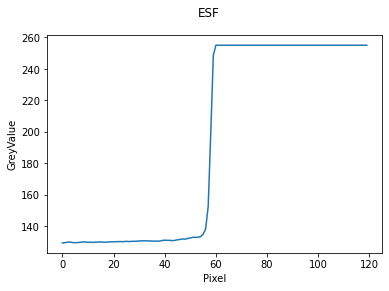

In [ ]:
plt.plot(pixel,meanOfColumns)
plt.xlabel('Pixel')
plt.ylabel('GreyValue')
plt.suptitle('ESF')
plt.show()

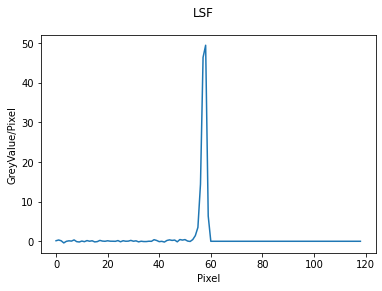

In [ ]:
plt.plot(LSF[1])
plt.xlabel('Pixel')
plt.ylabel('GreyValue/Pixel')
plt.suptitle('LSF')
plt.show()

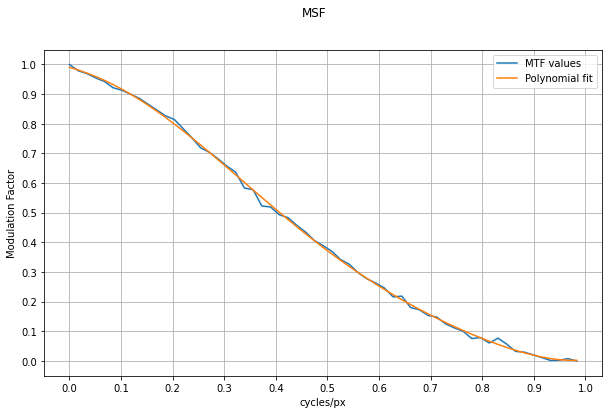

In [ ]:
mtf=abs(np.fft.fft(LSF[1]))
mtf = mtf[:len(mtf)//2]
ix = np.arange(mtf.shape[0]) / (mtf.shape[0])
#ix = np.arange(0,1,1./127)
#ix = ix/0.14
mtf_norm = [(float(i)-min(mtf))/(max(mtf)-min(mtf)) for i in mtf]
mtf_poly =  np.polyfit(ix, mtf_norm, 6)
poly = np.poly1d(mtf_poly)
plt.figure(figsize=(10,6))
mtf_simp, = plt.plot(ix, mtf_norm)
mtf_pol, = plt.plot(ix,poly(ix))
plt.xticks(np.arange(min(ix), max(ix)+0.1, 0.1))
plt.yticks(np.arange(min(mtf_norm), max(mtf_norm)+0.1, 0.1))
plt.xlabel('cycles/px')
plt.ylabel('Modulation Factor')
plt.suptitle('MSF')
plt.legend([mtf_simp,mtf_pol],["MTF values","Polynomial fit"])
plt.grid()
plt.show()

In [ ]:
ix = np.arange(mtf.shape[0]) / (mtf.shape[0])
ix

array([0.        , 0.01694915, 0.03389831, 0.05084746, 0.06779661,
       0.08474576, 0.10169492, 0.11864407, 0.13559322, 0.15254237,
       0.16949153, 0.18644068, 0.20338983, 0.22033898, 0.23728814,
       0.25423729, 0.27118644, 0.28813559, 0.30508475, 0.3220339 ,
       0.33898305, 0.3559322 , 0.37288136, 0.38983051, 0.40677966,
       0.42372881, 0.44067797, 0.45762712, 0.47457627, 0.49152542,
       0.50847458, 0.52542373, 0.54237288, 0.55932203, 0.57627119,
       0.59322034, 0.61016949, 0.62711864, 0.6440678 , 0.66101695,
       0.6779661 , 0.69491525, 0.71186441, 0.72881356, 0.74576271,
       0.76271186, 0.77966102, 0.79661017, 0.81355932, 0.83050847,
       0.84745763, 0.86440678, 0.88135593, 0.89830508, 0.91525424,
       0.93220339, 0.94915254, 0.96610169, 0.98305085])

In [ ]:
3.57*0.14

0.4998

# Other people's work I study

Row: 0
Row: 1
Row: 2
Row: 3
Row: 4
Row: 5
Row: 6
Row: 7
Row: 8
Row: 9
Row: 10
Row: 11
Row: 12
Row: 13
Row: 14
Row: 15
Row: 16
Row: 17
Row: 18
Row: 19
Row: 20
Row: 21
Row: 22
Row: 23
Row: 24
Row: 25
Row: 26
Row: 27
Row: 28
Row: 29
Row: 30
Row: 31
Row: 32
Row: 33
Row: 34
Row: 35
Row: 36
Row: 37
Row: 38
Row: 39
Row: 40
Row: 41
Row: 42
Row: 43
Row: 44
Row: 45
Row: 46
Row: 47
Row: 48
Row: 49
Row: 50
Row: 51
Row: 52
Row: 53
Row: 54
Row: 55
Row: 56
Row: 57
Row: 58
Row: 59
Row: 60
Row: 61
Row: 62
Row: 63
Row: 64
Row: 65
Row: 66
Row: 67
Row: 68
Row: 69
Row: 70
Row: 71
Row: 72
Row: 73
Row: 74
Row: 75
Row: 76
Row: 77
Row: 78
Row: 79
Row: 80
Row: 81
Row: 82
Row: 83
Row: 84
Row: 85
Row: 86
Found  87 valid transects out of  87
Refined subpx edge pos. Coefficient of correlation:  0.9960098644997619
STEP:  0
Removed outlier 49.0
Removed outlier 61.0
Removed outlier 62.0
Removed outlier 63.0
Removed outlier 67.0
Removed outlier 68.0
Remaining transects:  81
Refined subpx edge pos. Coefficient of correl

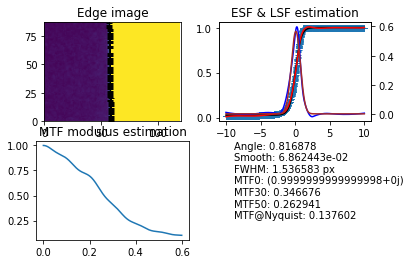

In [ ]:
# -*- coding: utf-8 -*-
"""
Copyright 2020 Jorge Gil

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
"""

"""
Robust ESF, PSF, FWHM & MTF estimation from low quality targets and synthetic edge creation.
"""
try:
    from osgeo import gdal
except ImportError:
    import gdal
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate, ndimage, stats
from scipy.optimize import OptimizeWarning



class Edge:
    Cols = None
    Rows = None
    Angle = None
    EdgeFileName = None
    Fwhm = None
    SuperSampFactor = 1000
    Dark = np.iinfo(np.uint16).max*0.2
    Bright = np.iinfo(np.uint16).max*0.8

    def __init__(self, edgeFileName, fWhm, angle=10, cols=500, rows=100):
        self.Cols = cols
        self.Rows = rows
        self.Fwhm = fWhm
        self.Angle = np.float64(angle-90)
        self.EdgeFileName = edgeFileName
        self.create()

    def gaussian(self, x, a, b, c, w):
        fLog2 = -4*np.log(2)
        return a + b*np.power(np.e, fLog2*np.power(x-c,2)/np.power(w,2))

    def create(self):
        angle = np.float64(self.Angle)*np.pi/180
        scols = self.Cols*self.SuperSampFactor
        fwhm = self.Fwhm #px
        sFwhm = fwhm*self.SuperSampFactor
        superGaussian = self.gaussian(np.linspace(-5*self.SuperSampFactor, 5*self.SuperSampFactor, 10*self.SuperSampFactor, dtype=np.float64), 0, 1, 0, sFwhm)
        superGaussian = superGaussian/np.sum(superGaussian)

        driver = gdal.GetDriverByName("GTiff")
        dst_ds = driver.Create(self.EdgeFileName, self.Cols, self.Rows, 1, gdal.GDT_UInt16)
        band = dst_ds.GetRasterBand(1)


        for row in range(0, self.Rows):

            superEdgePos = np.int(\
                           np.round(\
                                scols//2 + 0.5*self.SuperSampFactor*(2*row-self.Rows)/np.tan(angle)\
                           ))

            superEdge = np.ones([scols+2*superGaussian.shape[0]], dtype=np.float64)*self.Bright
            superEdge[superEdgePos:] = self.Dark
            edge = np.zeros(self.Cols+np.int(np.ceil(2*superGaussian.shape[0]/self.SuperSampFactor)), dtype=np.float64)

            for col in range(0, self.Cols + 2):
                edge[col] = np.sum(superEdge[col*self.SuperSampFactor:col*self.SuperSampFactor+superGaussian.shape[0]]*superGaussian)


            edge = edge[0:self.Cols]
            edge = np.round(edge)

            band.WriteArray(np.expand_dims(edge, axis=0), 0, row)


        band = None
        dst_ds = None




def sigmoid(x, a, b, l, s):
    return a+b*(1/(1+np.power(np.e, -l*(x+s))))


class Transect:
    __X = None
    __Y = None
    __IsValid = True
    __Snr = None
    __SigmoidParams = None
    __MinPxs = np.float64(10) # Minimum acceptable PSF half-width (Not FWHM)
    Row = None
    EdgePx = None
    EdgeSubPx = None
    Plot = True



    def __init__(self, x, y, row):
        # Clean nodata values
        self.__X = np.float64(x[y!=0])
        self.__Y = np.float64(y[y!=0])
        self.Row = np.float64(row)

        if type(self.__X) != np.ndarray or self.__X.shape[0] <= 2*self.__MinPxs:
            print("Not enough pixels in the transect. Set to invalid.")
            self.__IsValid = False
            return None

        self.__getEdgePx()


    def __getEdgePx(self):
        ySmooth = ndimage.filters.gaussian_filter(self.__Y, 1)

        grad = np.abs(np.diff(ySmooth)/np.diff(self.__X))
        maxPx = self.__X[:-1][grad == np.max(grad)]

        # If there are more than one
        maxPx = [np.round(np.average(maxPx))]

        if maxPx-np.min(self.__X) < self.__MinPxs or np.max(self.__X) - maxPx < self.__MinPxs:
            print("Not enough pixels to build a PSF. Set to invalid")
            self.__IsValid = False
            return None

        self.EdgePx = maxPx[0]


    """
    def getSnr(self):
        if not self.__IsValid:
            return None

        edgeIdx = np.where(self.__X == self.EdgePx)[0][0]

        l = self.__Y[:edgeIdx]
        r = self.__Y[edgeIdx:]

        lAvg = np.average(l)
        rAvg = np.average(r)

        if lAvg < rAvg:
            self.__Increase = True
        else:
            self.__Increase = False

        self.__Snr = np.abs(lAvg-rAvg)/np.sqrt(np.power(np.std(l),2)+np.power(np.std(r),2))
        return self.__Snr
    """



    def sigmoidFit(self, initGuess):
        if initGuess is None:
            initGuess = [np.min(self.__Y), np.max(self.__Y), 1.0, -self.EdgePx]

        try:
            popt, pcov = optimize.curve_fit(sigmoid, self.__X, self.__Y, p0=initGuess)
            self.__SigmoidParams = popt
            self.EdgeSubPx = -self.__SigmoidParams[3]
        except OptimizeWarning:
            return False, False
        except:
            return False, False

        """
        if self.Plot:
            a, b, l, s = popt
            #plt.figure()
            x = np.arange(np.min(self.__X), np.max(self.__X), step=1e-2)
            plt.plot(self.__X, self.__Y, ".")
            plt.plot(x, sigmoid(x, a, b, l, s), "-")
            #print s
            #plt.show()
        """

        return popt, pcov

    def getRefinedData(self):
        if not self.__IsValid:
            raise Exception("Invalid transects")

        a, b, l, s = self.__SigmoidParams
        return np.array([self.__X-self.EdgeSubPx, (self.__Y-a)/b])

    def isValid(self):
        return self.__IsValid

    def invalidate(self):
        self.__IsValid = False

    def getInitGuess(self):
        return self.__SigmoidParams




class Mtf:

    __PreRefinementEdgeSubPx = None
    __RefineEdgeSubPxStep = 0
    Image = None
    ResultsStr = ""
    Transects = list()
    LVarThresh2 = np.float64(3e-2)          # Squared variance threshold for l
    OverSampFreq = np.float64(1e3)          # Samples per pixel
    PsfMaxHalfWidth = np.float64(10)        # Pixels
    Figure = None
    SubPlot = None
    Plot = True

    def __init__(self, imagePath):

        image = self.readImage(imagePath)
        self.Image = image
        rows, cols  = image.shape

        # Prepare plot
        if self.Plot:
            self.Figure, self.SubPlot = plt.subplots(2, 2)
            self.Figure.subplots_adjust(hspace=0.2, wspace=0.2)


        # Create an initial list of valid transects
        initGuess = None
        x = np.float64(np.arange(0, cols))
        for i in range(0, rows):
            r =image[i,:]
            print("Row:", i)
            t = Transect(x, r, i)

            # Find subpx edge position
            if t.isValid():
                popt, pcov = t.sigmoidFit(initGuess)

                if popt is False:
                    t.invalidate()
                    print("Unable to fit row")
                    continue

                if pcov[2][2] < self.LVarThresh2:
                    initGuess = t.getInitGuess()
                    self.Transects.append(t)
                else:
                    t.invalidate()
                    print("Set to invalid due to bad 'l' covariance")

        print ("Found ", len(self.Transects), "valid transects out of ",rows)

        for i in range(0, 2): # First: Remove outliers. Second: Recalculate linear regression.
            self.refineEdgeSubPx()

        lsfData = self.getEsfData()
        lsf = self.calcOptimizedLsf(lsfData)
        self.calcMtf(lsf)


    # Refine by linear regression
    def refineEdgeSubPx(self):
        x = None
        y = None

        for t in self.Transects:
            if x is None:
                x = np.array([t.Row])
                y = np.array([t.EdgeSubPx])
            else:
                x = np.append(x, t.Row)
                y = np.append(y, t.EdgeSubPx)

        b, a, r, p, stderr = stats.linregress(x, y)

        print ("Refined subpx edge pos. Coefficient of correlation: ", r**2)

        diff = y - (a + b*x)
        #avg = np.average(diff)
        std = np.std(diff)

        print ("STEP: ", self.__RefineEdgeSubPxStep)

        if self.__RefineEdgeSubPxStep == 0: # Remove outliers
            transects = list()
            for t in self.Transects:
                if np.abs(a + b*t.Row - t.EdgeSubPx) > 1.75*std:
                    print ("Removed outlier", t.Row)
                    t.invalidate()
                else:
                    transects.append(t)
            self.__PreRefinementEdgeSubPx = np.array([y,x], dtype=np.float64)
            self.__RefineEdgeSubPxStep = 1
            self.Transects = transects
            print ("Remaining transects: ", len(self.Transects))
        else:                           # Set new subpixel edge pos
            self.__RefineEdgeSubPxStep = 2
            for t in self.Transects:
                t.EdgeSubPx = a + b*t.Row

        if len(self.Transects) < 5:
            raise Exception("Not enough transects")

        if self.__RefineEdgeSubPxStep == 2:

            self.ResultsStr += "Angle: %f\n" % -(np.arctan(b)*180/np.pi)

            if self.Plot:
                self.SubPlot[0,0].imshow(self.Image)
                #self.SubPlot[0,0].plot(self.__PreRefinementEdgeSubPx[0],self.__PreRefinementEdgeSubPx[1], "+", color="black")
                self.SubPlot[0,0].plot(y, x, "+", color="black")
                xAux = np.arange(np.min(x), np.max(x), step=1e-3)
                self.SubPlot[0,0].plot(a+b*xAux, xAux ,"-", color="black")
                self.SubPlot[0,0].set_title('Edge image')
                self.SubPlot[0,0].axes.set_xlim(left=0, right=self.Image.shape[1])
                self.SubPlot[0,0].axes.set_ylim([0, self.Image.shape[0]])


    def getEsfData(self):
        esfData = None
        for t in self.Transects:
            if esfData is None:
                esfData = t.getRefinedData()
            else:
                esfData = np.append(esfData, t.getRefinedData(), axis=1)

        esfData = np.sort(esfData, axis=1)
        filter = np.logical_and([esfData[0] >= -self.PsfMaxHalfWidth], [esfData[0] <= self.PsfMaxHalfWidth])[0]
        return np.compress(filter, esfData, axis=1)


    """
    Find best spline smoothing factor and gaussian
    by using a Levenberg-Marquardt optimization
    """
    def calcOptimizedLsf(self, esfData):

        print("Optimizing LSF")

        fLog2 = -4*np.log(2)
        def gaussianFunc(x, a, b, c, w):
            return a + b*np.power(np.e, fLog2*np.power(x-c,2)/np.power(w,2))



        def costFunc(params):
            smooth, ga, gb, gc, gw = params
            lsfRep = interpolate.splrep(x, y, k=3, s=smooth)
            psfSpline = interpolate.splev(xAux, lsfRep, der=1)
            return np.sum(np.abs(psfSpline - gaussianFunc(xAux, ga, gb, gc, gw)))

        def fwhm_from_lsf(x, y): # Instead of of the Gaussian model
            c = np.where(y == np.max(y))[0][0] # x value for maximum, center
            y = np.abs(y - np.max(y)/2.)
            left = np.where(y[:c] == np.min(y[:c]))
            right = np.where(y[c:] == np.min(y[c:])) + c
            left = x[left[0][0]]
            right = x[right[0][0]]
            return right - left

        x = esfData[0]
        y = esfData[1]

        xAux = np.arange(np.min(x), np.max(x), step=1/self.OverSampFreq)

        initGuess = [np.min(y), np.max(y), 1.0, 0]
        popt, pcov = optimize.curve_fit(sigmoid, x, y, p0=initGuess)
        a, b, l, s = popt

        #m = np.float64(esfData.shape[1])

        #x0 = [(m - np.sqrt(2*m))*1e-5, a, b/2, s, 2]
        x0 = [1e-9, a, b/2, s, 2]
        #bounds = [(1e-12,None),(0,1),(0,1),(-self.PsfMaxHalfWidth,self.PsfMaxHalfWidth),(-self.PsfMaxHalfWidth,self.PsfMaxHalfWidth)]
        bounds = [\
                  (1e-10,0.2),\
                  (0,0.1),\
                  (0,3),\
                  (-self.PsfMaxHalfWidth,self.PsfMaxHalfWidth),\
                  (-self.PsfMaxHalfWidth,self.PsfMaxHalfWidth)\
                  ]
        opt = optimize.minimize(costFunc, \
                                x0, \
                                args=(), method='L-BFGS-B', jac=None, \
                                bounds=bounds, \
                                tol=None, callback=None, options={'disp': None, 'maxls': 20, 'iprint': -1, 'gtol': 1e-05, 'eps': 1e-08, 'maxiter': 15000, 'ftol': 2.220446049250313e-09, 'maxcor': 10, 'maxfun': 15000})
        optSmooth, ga, gb, gc, gw = opt['x']

        self.ResultsStr += "Smooth: %e \n" % optSmooth

        lsfRep = interpolate.splrep(x, y, k=3, s=optSmooth)
        lsfSpline = interpolate.splev(xAux, lsfRep, der=1)

        """
        # Write the LSF to a file for external analysis
        oFile = open("/tmp/lsf.csv", "w")
        oFile.write("pixel, lsf\n")
        for i in np.array([xAux,lsfSpline]).T:
            oFile.write("%.24e,%.24e\n" % (i[0], i[1]))
        oFile.close()
        """

        self.ResultsStr += "FWHM: %f px\n" % gw  # From estimated Gaussian

        if self.Plot:
            esfSpline = interpolate.splev(xAux, lsfRep)
            self.SubPlot[0,1].plot(esfData[0], esfData[1], "+")
            self.SubPlot[0,1].plot(xAux, sigmoid(xAux, a, b, l, s) ,"-", color="black")
            self.SubPlot[0,1].plot(xAux, esfSpline,"-", color="red")


            lsfPlot = self.SubPlot[0,1].twinx()
            #self.SubPlot[0,1].plot(xAux, lsfSpline,"-", color="blue")
            #self.SubPlot[0,1].plot(xAux, gaussianFunc(xAux, ga, gb, gc, gw),"-", color="brown")
            lsfPlot.plot(xAux, lsfSpline,"-", color="blue")
            lsfPlot.plot(xAux, gaussianFunc(xAux, ga, gb, gc, gw),"-", color="brown")
            self.SubPlot[0,1].set_title("ESF & LSF estimation")

        return np.array([xAux,lsfSpline])



    def calcMtf(self, lsf):

        # If needed, remove the last element of the PSF to get an even number of elements
        if lsf.shape[1]/2. != lsf.shape[1]//2.:
            lsf = lsf[:,:-1]

        sampFreq = np.float64(lsf.shape[1])/(np.max(lsf[0])-np.min(lsf[0]))

        lsf = lsf[1]
        n = lsf.shape[0]

        lsf = np.append(
                np.append(
                    np.zeros([20*n]),
                    lsf),
                np.zeros([20*n])
            )

        lsf = lsf/np.sum(lsf)
        n = np.float64(lsf.shape[0])
        mtf = np.fft.rfft(lsf)
        mtfFreq = np.linspace(0, 0.5*sampFreq, num=mtf.shape[0], dtype=np.float64)

        mtfVsFreq = interpolate.interp1d(mtfFreq, np.absolute(mtf), kind='linear')
        freqVsMtf = interpolate.interp1d(np.absolute(mtf), mtfFreq, kind='linear')
        self.ResultsStr += "MTF0: %s \n" % mtf[0]
        self.ResultsStr += "MTF30: %f \n" % freqVsMtf(0.3)
        self.ResultsStr += "MTF50: %f \n" % freqVsMtf(0.5)
        self.ResultsStr += "MTF@Nyquist: %f \n" % mtfVsFreq(0.5)
        print("\n############ Results\n"+self.ResultsStr+"####################\n")


        if self.Plot:
            mtf = mtf[mtfFreq <= 0.6]
            mtfFreq = mtfFreq[mtfFreq <= 0.6]
            self.SubPlot[1,0].plot(mtfFreq, np.absolute(mtf), "-")
            self.SubPlot[1,0].set_title("MTF modulus estimation")

            self.SubPlot[1,1].axis('off')
            self.SubPlot[1,1].text(0.1, 0.1, str(self.ResultsStr))
            plt.show()



    def readImage(self, imagePath):
        ds = gdal.Open(imagePath, gdal.GA_ReadOnly)
        rows = ds.RasterYSize
        cols = ds.RasterXSize
        band = ds.GetRasterBand(1)
        image = np.float64(band.ReadAsArray(0, 0, cols, rows))
        band = None
        ds = None
        return image

ImageFile = "/content/IMG-0001-0000123.png"

"""
angle="16.776550"
fwhm="2.101313"
imgFile = "/ram/myedge_angle_"+str(angle)+"_fwhm_"+str(fwhm)+".tif"
edge = Edge(imgFile, np.float64(fwhm), cols=500, rows=100, angle=np.float64(angle))
ImageFile = imgFile
"""

mtf = Mtf(ImageFile)


exit(0)


In [ ]:
"""Modulation Transfer Function Module for slanted edge figures
The optical transfer function (OTF) of an optical system specifies
how different spatial frequencies are handled by the system.
It is used by optical engineers to describe how the optics project
light from the object or scene onto detector or simply the next item
in the optical transmission chain.
A variant, the modulation transfer function (MTF), neglects phase effects,
but is equivalent to the OTF in many situations.
look also: https://en.wikipedia.org/wiki/Optical_transfer_function
In normal operation MTF is fourier transform of Point Spread Function.
But for slanted edge targeted MTF calculations we use LSF instead of PSF.
This is because we assume LSF as cross-section of PSF along slant.
LSF can be optained using detivative of Edge Spread Function (ESF).
For line scan operations it is better to calculate along track and
across track MTF's.
Also for non symetrical pixel pitch/sizes it will also be convinient
to calculate horizontal and vertical slants.
Note that, the prefered slant tilt is between 2 degree and 10 degree.
Dependencies
    Pillow numpy scipy matpilotlib opencv-python
"""
import matplotlib.pyplot as plt
import pylab as pylab
import numpy as np
import cv2 as cv2
import math as math

from PIL import Image, ImageOps
from scipy import interpolate
from scipy.fft import fft
from enum import Enum
from dataclasses import dataclass

@dataclass
class cSet:
    """
    Base class to store index value pairs
    ...
    Attributes
    x : np.ndarray
        numpy array to store indexes
    y : np.ndarray
        numpy array to store values
    """
    x: np.ndarray
    y: np.ndarray

@dataclass
class cESF:
    """
    Base class to store Edge Spread Function (ESF) analysis output
    ...
    Attributes
    rawESF : cSet
        ESF optained from image
    interpESF : cSet
        Interpolated ESF of rawESF
    threshold :float
        threshold used to get ESF
    width : float
        pixel transition width
    angle : float
        slant angle in degrees
    edgePoly : np.ndarray
        polynomial of edge slant
    """
    rawESF: cSet
    interpESF: cSet
    threshold:float
    width: float
    angle: float
    edgePoly: np.ndarray

@dataclass
class cMTF:
    """
    Base class to Modulation Transfer Function (MTF) values
    ...
    Attributes
    x : np.ndarray
        numpy array to store indexes
    y : np.ndarray
        numpy array to store values
    mtfAtNyquist : float
        MTF value at Nyquist Frequency
    width : float
        Pixel transition
    """
    x: np.ndarray
    y: np.ndarray
    mtfAtNyquist: float
    width: float

class Verbosity(Enum):
    """
    Output types of module methods
    ...
    Enumerations
    NONE : no output
    BRIEF : brif text output
    DETAIL : graphical output
    """
    NONE = 0
    BRIEF = 1
    DETAIL = 2

class Helper:
    @staticmethod
    def LoadImage(filename):
        """
        Load image from given path
        ...
        Parameters
        filename : str
            a fully quialified file name of the image
        ...
        Returns
        PIL.Image
            Grayscale image data
        """
        img = Image.open(filename)
        if img.mode in {'I;16','I;16L','I;16B','I;16N'}:
            gsimg = img
        else:
            gsimg = img.convert('L')
        return gsimg

    @staticmethod
    def LoadImageAsArray(filename):
        """
        Load and convert image from given path to numpy array
        ...
        Parameters
        filename : str
            a fully quialified file name of the image
        ...
        Returns
        np.darray
            Grayscale image data as numpy array with values between 0.0 and 1.0
        """
        img = Helper.LoadImage(filename)
        if img.mode in {'I;16','I;16L','I;16B','I;16N'}:
            arr = np.asarray(img, dtype=np.double)/65535
        else:
            arr = np.asarray(img, dtype=np.double)/255
        return arr

    @staticmethod
    def ImageToArray(img):
        """
        Convert PIL image to numpy array
        ...
        Parameters
        img : PIL.Image
            Source image
        ...
        Returns
        np.darray
            Grayscale image data as numpy array with values between 0.0 and 1.0
        """
        if img.mode in {'I;16','I;16L','I;16B','I;16N'}:
            arr = np.asarray(img, dtype=np.double)/65535
        else:
            arr = np.asarray(img, dtype=np.double)/255
        return arr

    @staticmethod
    def ArrayToImage(imgArr):
        """
        Convert numpy array to PIL image
        ...
        Parameters
        imgArr : np.darray
            Image data as numpy array having values between 0.0 and 1.0
        ...
        Returns
        PIL.Image
            Grayscale PIL image
        """
        img = Image.fromarray(imgArr*255, mode='L')
        return img

    @staticmethod
    def CorrectImageOrientation(imgArr):
        """
        Rotate, transpose, flip image to get correct orientation for analysis
        Module assumes a "dark side up" horizontal slanted image
        ...
        Parameters
        imgArr : np.darray
            Image data as numpy array having values between 0.0 and 1.0
        ...
        Returns
        np.darray
            Orientation corrected image array
        """
        tl = np.average(imgArr[0:2,0:2])
        tr = np.average(imgArr[0:2,-3:-1])
        bl = np.average(imgArr[-3:-1,0:2])
        br = np.average(imgArr[-3:-1,-3:-1])
        edges = [tl, tr, bl, br]
        edgeIndexes = np.argsort(edges)
        if (edgeIndexes[0] + edgeIndexes[1]) == 1:
            pass
        elif (edgeIndexes[0] + edgeIndexes[1]) == 5:
            imgArr = np.flip(imgArr, axis=0)
        elif (edgeIndexes[0] + edgeIndexes[1]) == 2:
            imgArr = np.transpose(imgArr)
        elif (edgeIndexes[0] + edgeIndexes[1]) == 4:
            imgArr = np.flip(np.transpose(imgArr), axis=0)

        return imgArr

class MTF:
    @staticmethod
    def SafeCrop(values, distances, head, tail):
        """
        Safely crop a index-value array from head to tail
        Note that, method does not crop operation uses values of distance
          not index itself
        ...
        Parameters
        value : np.darray
            Value array
        distances : np.darray
            Index array
        head : float
            Desired crop start index value
        tail : float
            Desired crop end index value
        ...
        Returns
        cSet
            crop result as cSet
        """
        isIncrementing = True
        if distances[0] > distances[-1]:
            isIncrementing = False
            distances = -distances
            dummy = -tail
            tail = -head
            head = dummy


        hindex = (np.where(distances < head)[0])
        tindex = (np.where(distances > tail)[0])

        if hindex.size < 2:
            h = 0
        else:
            h = np.amax(hindex)

        if tindex.size == 0:
            t = distances.size
        else:
            t = np.amin(tindex)

        if isIncrementing == False:
            distances = -distances

        return cSet(distances[h:t], values[h:t])

    @staticmethod
    def GetEdgeSpreadFunction(imgArr, edgePoly, verbose=Verbosity.NONE):
        """
        Calculate Edge Spred Function (ESF)

        ESF is simply distance map of every pixel to the given edge polynomial
        https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line
        ...
        Parameters
        imgArr : np.darray
            Image data as numpy array having values between 0.0 and 1.0
        edgePoly : np.darray
            Edge polynomial parameters
        verbose : Verbosity
            Output verbosity level
        ...
        Returns
        cSet
            ESF as value index set
        """
        Y = imgArr.shape[0]
        X = imgArr.shape[1]

        values = np.reshape(imgArr, X*Y)

        distance = np.zeros((Y,X))
        column = np.arange(0,X)+0.5
        for y in range(Y):
            distance[y,:] = (edgePoly[0]*column - (y+0.5) + edgePoly[1]) / np.sqrt(edgePoly[0]*edgePoly[0] + 1)

        distances = np.reshape(distance, X*Y)
        indexes = np.argsort(distances)

        sign = 1
        if np.average(values[indexes[:10]]) > np.average(values[indexes[-10:]]):
            sign = -1

        values = values[indexes]
        distances = sign*distances[indexes]

        if (distances[0] > distances[-1]):
            distances = np.flip(distances)
            values = np.flip(values)

        if (verbose == Verbosity.BRIEF):
            print("Raw ESF [done] (Distance from {0:2.2f} to {1:2.2f})".format(sign*distances[0], sign*distances[-1]))

        elif (verbose == Verbosity.DETAIL):
            x = [0, np.size(imgArr,1)-1]
            y = np.polyval(edgePoly, x)

            fig = pylab.gcf()
            fig.canvas.manager.set_window_title('Raw ESF')
            (ax1, ax2) = plt.subplots(2)
            ax1.imshow(imgArr, cmap='gray', vmin=0.0, vmax=1.0)
            ax1.plot(x, y, color='red')
            ax2.plot(distances, values)
            plt.show()
            plt.show(block=False)

        return cSet(distances, values)

    @staticmethod
    def GetEdgeSpreadFunctionCrop(imgArr, verbose=Verbosity.NONE):
        """
        Calculate and crop Edge Spread Function (ESF).
        Crop occures around center of transition
        ...
        Parameters
        imgArr : np.darray
            Image data as numpy array having values between 0.0 and 1.0
        verbose : Verbosity
            Output verbosity level
        ...
        Returns
        cESF
            Extended ESF information
        """
        imgArr = Helper.CorrectImageOrientation(imgArr)
        edgeImg = cv2.Canny(np.uint8(imgArr*255), 40, 90, L2gradient=True)

        line = np.argwhere(edgeImg == 255)
        edgePoly = np.polyfit(line[:,1],line[:,0],1)
        angle = math.degrees(math.atan(-edgePoly[0]))

        finalEdgePoly = edgePoly.copy()
        if angle > 0:
            imgArr = np.flip(imgArr, axis=1)
            finalEdgePoly[1] = np.polyval(edgePoly,np.size(imgArr,1)-1)
            finalEdgePoly[0] = -edgePoly[0]

        esf = MTF.GetEdgeSpreadFunction(imgArr, finalEdgePoly, Verbosity.NONE)

        esfValues = esf.y
        esfDistances = esf.x

        maximum = np.amax(esfValues)
        minimum = np.amin(esfValues)

        threshold = (maximum - minimum) * 0.1

        head = np.amax(esfDistances[(np.where(esfValues < minimum + threshold))[0]])
        tail = np.amin(esfDistances[(np.where(esfValues > maximum - threshold))[0]])

        width = abs(head-tail)

        esfRaw = MTF.SafeCrop(esfValues, esfDistances, head - 1.2*width, tail + 1.2*width)

        qs = np.linspace(0,1,20)[1:-1]
        knots = np.quantile(esfRaw.x, qs)
        tck = interpolate.splrep(esfRaw.x, esfRaw.y, t=knots, k=3)
        ysmooth = interpolate.splev(esfRaw.x, tck)

        InterpDistances = np.linspace(esfRaw.x[0], esfRaw.x[-1], 500)
        InterpValues = np.interp(InterpDistances, esfRaw.x, ysmooth)

        esfInterp = cSet(InterpDistances, InterpValues)

        if (verbose == Verbosity.BRIEF):
            print("ESF Crop [done] (Distance from {0:2.2f} to {1:2.2f})".format(esfRaw.x[0], esfRaw.x[-1]))

        elif (verbose == Verbosity.DETAIL):
            x = [0, np.size(imgArr,1)-1]
            y = np.polyval(finalEdgePoly, x)

            fig = pylab.gcf()
            fig.canvas.manager.set_window_title('ESF Crop')
            (ax1, ax2) = plt.subplots(2)
            ax1.imshow(imgArr, cmap='gray', vmin=0.0, vmax=1.0)
            ax1.plot(x, y, color='red')
            ax2.plot(esfRaw.x, esfRaw.y,InterpDistances,InterpValues)
            plt.show(block=False)
            plt.show()

        return cESF(esfRaw, esfInterp, threshold, width, angle, edgePoly)

    @staticmethod
    def SimplifyEdgeSpreadFunction(esf, verbose=Verbosity.NONE):
        """
        Remove dublicate distance occurances of Edge Spread Function.
        ...
        Parameters
        esf : cSet
            ESF index-value set
        verbose : Verbosity
            Output verbosity level
        ...
        Returns
        cSet
            Shrinked ESF index-value set
        """
        res = np.unique(esf.x, return_index=True, return_counts=True)

        indexes = res[1]
        counts = res[2]
        sz = np.size(res[0])

        distances = esf.x[indexes]
        values = np.zeros(sz, dtype=np.float)

        for x in range(sz):
            values[x] = np.sum(esf.y[indexes[x]:indexes[x]+counts[x]])/counts[x]

        if (verbose == Verbosity.BRIEF):
            print("ESF Simplification [done] (Size from {0:d} to {1:d})".format(np.size(esf.x), np.size(distances)))

        elif (verbose == Verbosity.DETAIL):
            fig = pylab.gcf()
            fig.canvas.manager.set_window_title("ESF Simplification (Size from {0:d} to {1:d})".format(np.size(esf.x), np.size(distances)))
            (ax1, ax2) = plt.subplots(2)
            ax1.plot(esf.x, esf.y)
            ax2.plot(distances, values)
            plt.show(block=False)
            plt.show()

        return cSet(distances, values)

    @staticmethod
    def GetLineSpreadFunction(esf, normalize=True, verbose=Verbosity.NONE):
        """
        Calculate Line Spread Function (LSF) from ESF

        LSF is simply the derivative of ESF.
        For a better result, an interpolated ESF can be used instead of raw ESF
        ...
        Parameters
        esf : cSet
            ESF index-value set
        normalize : bool
            Calculated normalized LSF
        verbose : Verbosity
            Output verbosity level
        ...
        Returns
        cSet
            LSF index-value set
        """
        lsfDividend = np.diff(esf.y)
        lsfDivisor  = np.diff(esf.x)

        lsfValues = np.divide(lsfDividend, lsfDivisor)
        lsfDistances = esf.x[0:-1]

        if normalize:
            lsfValues = lsfValues / (max(lsfValues))

        if (verbose == Verbosity.BRIEF):
            print("MTF [done]")

        elif (verbose == Verbosity.DETAIL):
            fig = pylab.gcf()
            fig.canvas.manager.set_window_title("LSF")
            (ax1) = plt.subplots(1)
            ax1.plot(lsfDistances, lsfValues)
            plt.show(block=False)
            plt.show()

        return cSet(lsfDistances, lsfValues)

    @staticmethod
    def GetMTF(lsf, verbose=Verbosity.NONE):
        """
        Calculate Modulation Transform Function (MTF) from LSF
        ...
        Parameters
        lsf : cSet
            LSF index-value set
        verbose : Verbosity
            Output verbosity level
        ...
        Returns
        cMTF
            MTF value set except pixel transition width
        """
        N = np.size(lsf.x)
        px = N/(lsf.x[-1]-lsf.x[0])
        values = 1/np.sum(lsf.y)*abs(fft(lsf.y))
        distances = np.arange(0,N)/N*px

        interpDistances = np.linspace(0,1,50)
        interp = interpolate.interp1d(distances, values, kind='cubic')
        interpValues = interp(interpDistances)
        valueAtNyquist = interpValues[25]*100

        if (verbose == Verbosity.BRIEF):
            print("MTF [done]")

        elif (verbose == Verbosity.DETAIL):
            fig = pylab.gcf()
            fig.canvas.manager.set_window_title("MTF ({0:2.2f}% at Nyquist)".format(valueAtNyquist))
            (ax1) = plt.subplots(1)
            ax1.plot(interpDistances, interpValues)
            #ax1.plot( values)
            plt.show(block=False)
            plt.show()

        return cMTF(interpDistances, interpValues, valueAtNyquist, -1.0)

    @staticmethod
    def CalculateMtf(imgArr, verbose=Verbosity.NONE):
        """
        Calculate Modulation Transform Function (MTF) of an image array
        ...
        Parameters
        imgArr : np.darray
            Image data as numpy array having values between 0.0 and 1.0
        verbose : Verbosity
            Output verbosity level
        ...
        Returns
        cMTF
            MTF value set
        """
        imgArr = Helper.CorrectImageOrientation(imgArr)
        esf = MTF.GetEdgeSpreadFunctionCrop(imgArr, Verbosity.NONE)
        lsf = MTF.GetLineSpreadFunction(esf.interpESF, True, Verbosity.NONE)
        mtf = MTF.GetMTF(lsf, Verbosity.NONE)

        if (verbose == Verbosity.BRIEF):
            print("MTF at Nyquist:{0:0.2f}%, Transition Width:{1:0.2f}".format(mtf.mtfAtNyquist, esf.width))

        elif (verbose == Verbosity.DETAIL):
            x = [0, np.size(imgArr,1)-1]
            y = np.polyval(esf.edgePoly, x)

            fig = pylab.gcf()
            fig.canvas.manager.set_window_title('MTF Analysis')
            gs = fig.add_gridspec(3,2)
            ax1 = fig.add_subplot(gs[0, 0])
            ax2 = fig.add_subplot(gs[1, 0])
            ax3 = fig.add_subplot(gs[2, 0])
            ax4 = fig.add_subplot(gs[:, 1])

            ax1.imshow(imgArr, cmap='gray', vmin=0.0, vmax=1.0)
            ax1.plot(x, y, color='red')
            ax1.axis('off')
            ax2.plot(esf.rawESF.x, esf.rawESF.y,
                     esf.interpESF.x, esf.interpESF.y)
            top = np.max(esf.rawESF.y)-esf.threshold
            bot = np.min(esf.rawESF.y)+esf.threshold
            ax2.plot([esf.rawESF.x[0], esf.rawESF.x[-1]], [top, top], color='red')
            ax2.plot([esf.rawESF.x[0], esf.rawESF.x[-1]], [bot, bot], color='red')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            ax3.plot(lsf.x, lsf.y)
            ax3.xaxis.set_visible(False)
            ax3.yaxis.set_visible(False)
            ax4.plot(mtf.x, mtf.y)
            ax4.set_title("MTF at Nyquist:{0:0.2f}%\nTransition Width:{1:0.2f}".format(mtf.mtfAtNyquist, esf.width))
            ax4.grid(True)

            plt.show(block=False)
            plt.show()

        return cMTF(x, y, mtfAtNyquist, esf.width)

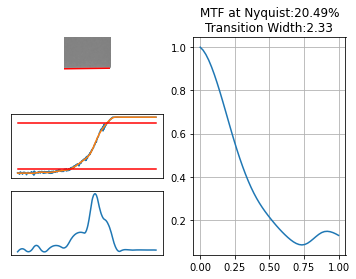

NameError: ignored

In [ ]:
imgArr = Helper.LoadImageAsArray('/content/IMG-0001-0000123.png')
res = MTF.CalculateMtf(imgArr, verbose=Verbosity.DETAIL)

[2.28416228 2.05955061 1.92740224 1.90801727 1.85467994 1.7273737
 1.63755247 1.66486726 1.63604602 1.616164   1.44515776 1.42320035
 1.28756046 1.13321091 1.10368355 1.04988445 0.94074159 0.85441202
 0.80762765 0.74738463 0.74738463 0.80762765 0.85441202 0.94074159
 1.04988445 1.10368355 1.13321091 1.28756046 1.42320035 1.44515776
 1.616164   1.63604602 1.66486726 1.63755247 1.7273737  1.85467994
 1.90801727 1.92740224 2.05955061]


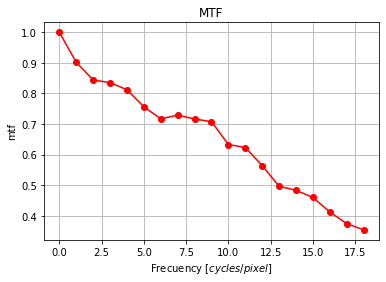

In [ ]:
img=cv2.imread('/content/IMG-0001-0000123.png')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#m_out=0.299*img[:,:,0]+0.589*img[:,:,1]+0.114*img[:,:,2]
#x=m_out[100,:]
x = img[86,:]
mu=np.sum(x)/(x.shape[0])
tmp=(x[:]-mu)**2
sigma=np.sqrt(np.sum(tmp)/(x.shape[0]))
edge_function=(x[:]-mu)/sigma
#print(edge_function)
edge_function=edge_function[::3]
#lsf=edge_function[:-2]-edge_function[2:]
lsf=np.abs(np.diff(edge_function))
mtf=abs(np.fft.fft(lsf))
print(mtf)
#print(np.max(mtf))
mtf=mtf[:]/np.max(mtf)
mtf=mtf[:len(mtf)//2]
#mtf=np.arange(mtf.shape[0]*mtf.shape[1]).reshape(mtf.shape[0],mtf.shape[1])
ix=np.arange(mtf.shape[0])/(mtf.shape[0])
mtf_poly=np.polyfit(ix, mtf,6)
#print(mtf_poly)
#mtf_poly=np.squeeze(mtf_poly)
#print(mtf.shape[0])
#print(mtf.shape[1])
#poly=np.poly1d(mtf_poly)
#print(poly)
plt.figure()
plt.title("MTF")
plt.xlabel(r'Frecuency $[cycles/pixel]$') ; plt.ylabel('mtf')
p= plt.plot(mtf,'-or')
#ll = plt.plot(poly(ix))
#plt.legend([p,ll],["MTF values","polynomial fit"])
plt.grid()
#plt.show()